In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU

tf.random.set_seed(42)

In [2]:
h_a = np.loadtxt('../../Data/data_39_highSI.txt', dtype=float)

# h_a = h_a * 0.1242
h_a = h_a[h_a>0]
h_a = h_a[1::20]

avr = np.average(h_a)
h_a = h_a/avr
h_a = h_a.reshape(-1,1)

In [3]:
N_train = 3500
N_test = 1000
timesteps = 6

train_data = h_a[:N_train].reshape(-1,1)
test_data = h_a[N_train:(N_train + N_test)].reshape(-1,1)

In [4]:
train_data_timesteps=np.array([[j for j in train_data[i:i+timesteps]] for i in range(0,len(train_data)-timesteps+1)])[:,:,0]
print(train_data_timesteps.shape)

test_data_timesteps=np.array([[j for j in test_data[i:i+timesteps]] for i in range(0,len(test_data)-timesteps+1)])[:,:,0]
print(test_data_timesteps.shape)

(3495, 6)
(995, 6)


In [5]:
x_train, y_train = train_data_timesteps[:,:timesteps-1],train_data_timesteps[:,[timesteps-1]]
x_test, y_test = test_data_timesteps[:,:timesteps-1],test_data_timesteps[:,[timesteps-1]]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3495, 5) (3495, 1)
(995, 5) (995, 1)


In [6]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

x_train.shape, x_test.shape

((3495, 5, 1), (995, 5, 1))

# Setup of the RNN Models and Running Them

In [7]:
model = Sequential([
    GRU(70, return_sequences=True, input_shape=(x_train.shape[1],1)),
    Dropout(0.01),
    GRU(70, return_sequences=False),
    Dropout(0.01),

    Dense(1),
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 5, 70)             15330     
                                                                 
 dropout (Dropout)           (None, 5, 70)             0         
                                                                 
 gru_1 (GRU)                 (None, 70)                29820     
                                                                 
 dropout_1 (Dropout)         (None, 70)                0         
                                                                 
 dense (Dense)               (None, 1)                 71        
                                                                 
Total params: 45,221
Trainable params: 45,221
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Training the model
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)
history = model.fit(
    x_train,
    y_train,
    epochs = 5,
    batch_size = 32,
    verbose = 1,
)

Epoch 1/5
110/110 [==============================] - 6s 9ms/step - loss: 0.0177
Epoch 2/5
110/110 [==============================] - 1s 9ms/step - loss: 6.1708e-04
Epoch 3/5
110/110 [==============================] - 1s 10ms/step - loss: 6.1044e-04
Epoch 4/5
110/110 [==============================] - 1s 9ms/step - loss: 6.2791e-04
Epoch 5/5
110/110 [==============================] - 1s 9ms/step - loss: 5.6169e-04


In [9]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

32/32 [==============================] - 0s 3ms/step


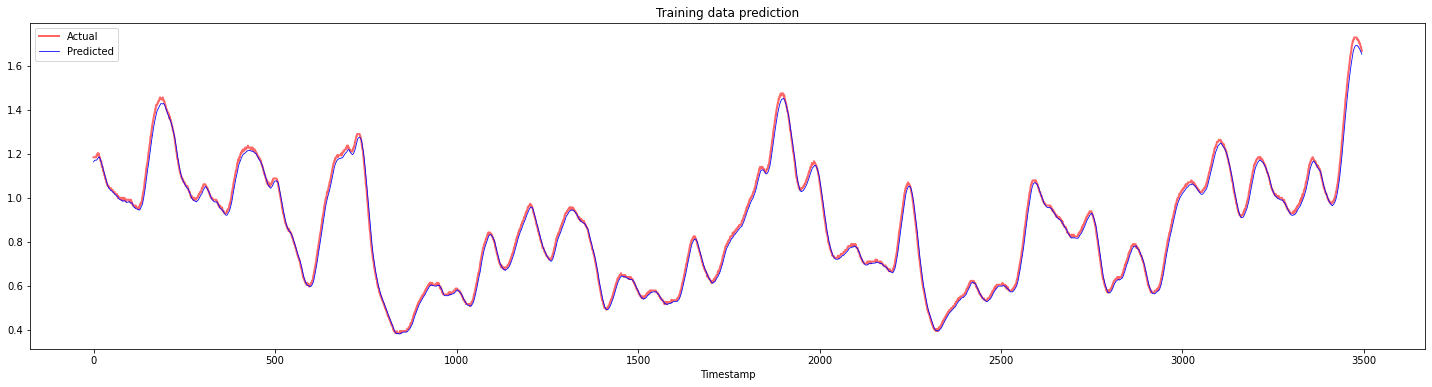

In [10]:
plt.figure(figsize=(25,6))
plt.plot(y_train, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(y_train_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction")
plt.show()

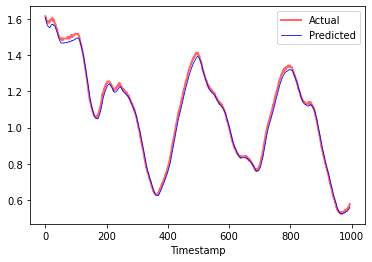

In [11]:
# plt.figure(figsize=(10,3))
plt.plot(y_test, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error
import math

print('RMSE for training data: ', math.sqrt(mean_squared_error(y_train_pred, y_train)))
print('RMSE for testing data: ', math.sqrt(mean_squared_error(y_test_pred, y_test)))

RMSE for training data:  0.019039816675886834
RMSE for testing data:  0.01839854298184156
